It is important to keep track and save the dataset in a specific account (i.e. @sandiego.edu) as you will use the same process in modules 2-7. 
It is recommended that you organize your dataset files into specific folders, such as "Module 2 Dataset."
Prepare the dataset

Create a new Google Colab Notebook and import housing.csv dataset into your notebook
Click "▶️ # Load the Drive helps and mount" to run cell dataset.
Go to this URL in a browser click "URL" displayed to grant access to your Google Drive and mount your drive. Authorize access to your Google Account.
Copy code and paste into "Enter your authorization code" textbox area. 


Construct the Neural Network.
Using the ANN in Practice as a resource, construct the Neural Network of Boston Housing data.
Validate the accuracy of the model
Your accuracy score (i.e. 0.858) should be displayed at the end of your prediction model.


Summarize your findings
In your own words state how accurate your model was against the test dataset. Your summary should be at least one paragraph in length, include an attached screenshot of your dataset results, and include your accuracy score and explanation.

## Initial Configuration
The below few cells will set up the libraries, global variables, and other necessary items before getting into exploratory analysis

In [99]:
# Import Libraries
import pandas as pd                                   # Allows usage of data frames
from sklearn.preprocessing import MinMaxScaler        # Allows use of minMaxScaler
from matplotlib import pyplot as plt                  # Heatmap plots
import seaborn as sns                                 # More plotting tools
from sklearn.model_selection import train_test_split  # Train Test split the data
from sklearn.neural_network import MLPRegressor       # To Train ANN, MLP regressor used
from sklearn import metrics                           # Import the metrics class

##### Global Variables
The below cell allows for capturing global variables to be used throughout the assignment

In [100]:
# Global Variables
dataFileName = "housing.csv" #@TODO he wants it saved to google drive rather than locally
targetColumnName = 'MEDV'    # Name of the dependant variable
testSize = .3                # Ratio of testing to training data

##### Reading the Boston Housing Data Frame
The below cell locally imports the data frame and prevents continuation of the flow of execution if the data frame doesn't have rows or doesn't have columns.

In [3]:
# Import the data file
df = pd.read_csv(dataFileName)

# Break if the data frame isn't properly imported
assert(df.shape[0] > 0 and df.shape[1] > 0)

## Exploratory Analysis
The below few cells will go over some light data exploration in order to determine the nuances and important characteristics of the data before creating a model.

##### Describe Data Frame
Here we are able to see the four columns all have 489 values. RM and PTRatio have fairly low standard deviations, whereas LSTAT and MEDV has a higher standard deviation. MEDV has much higher values between 100,000 and 1,000,000. 

In [101]:
# Perform basic data frame exploratory analysis
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,489.000000
mean,0.553915,0.304519,0.629422,0.379803
std,0.133068,0.196777,0.224603,0.179757
min,0.000000,0.000000,0.000000,0.000000
25%,0.479429,0.149764,0.510638,0.267123
50%,0.542485,0.269797,0.691489,0.363014
75%,0.623114,0.420672,0.808511,0.449772
max,1.000000,1.000000,1.000000,1.000000


#### Get Info of Data Frame
Here we are able to see that there are no null entries for the data frame. All four columns contain floating point values as well.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


## Data Preparation
The below few cells will scale and split the data frame to prepare it to be fed into our ANN.

##### Scaling Data Frame
Here we sort and normalize the data frame columms

In [104]:
# initialize min-max scaler
mm_scaler = MinMaxScaler()

column_names = list(df.columns)

# Transform all attributes
df[column_names] = mm_scaler.fit_transform(df[column_names])
df.sort_index(inplace=True)
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,0.623114,0.083356,0.287234,0.433790
1,0.591276,0.198944,0.553191,0.378995
2,0.749225,0.056960,0.553191,0.678082
3,0.710564,0.026674,0.648936,0.648402
4,0.741369,0.093081,0.648936,0.712329


##### Verifying Columns have been scaled
Describing the data below we see that the min and max of each column should be 0 and 1 respectively.

In [105]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,489.000000
mean,0.553915,0.304519,0.629422,0.379803
std,0.133068,0.196777,0.224603,0.179757
min,0.000000,0.000000,0.000000,0.000000
25%,0.479429,0.149764,0.510638,0.267123
50%,0.542485,0.269797,0.691489,0.363014
75%,0.623114,0.420672,0.808511,0.449772
max,1.000000,1.000000,1.000000,1.000000


In [106]:
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


<AxesSubplot:>

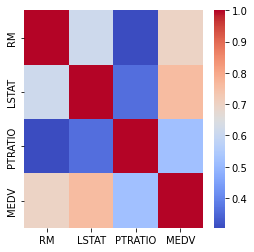

In [157]:
plt.figure(figsize=(4,4))
sns.heatmap(abs(df.corr()), cmap="coolwarm")

##### Splitting Independant and Dependant Variables
Here we want to break our data frame into our independant and dependant variables. MEDV is the dependant variable, which seems to have some strong correlation with LSTAT and RM, and less correlation with the PTRATIO.

In [158]:
# Make sure our global variable is in the data frame first
assert(targetColumnName in df.columns)

X = df.drop(targetColumnName, axis=1)
y = df[targetColumnName]

# Break flow of execution if we do not have exactly 3 independant variables or if any rows have somehow gone missing
assert(X.shape[0] == 489 and X.shape[1] == 3)
assert(len(y) == 489)

##### Test/Train Splitting
The below cell splits the data into test and training

In [159]:
# Split the training and test data from our global test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, shuffle = True, random_state=1)

# Break flow of execution of our test and training data is not behaving correctly
assert(X_train.shape[0] > 0 and X_train.shape[1] > 0)
assert(X_test.shape[0] > 0 and X_test.shape[1] > 0)
assert(len(y_train) > 0 and len(y_test) > 0)

## Building ANN

##### Create the Model
Here we use an MLP regressor to predict the independant variable

In [160]:
# Create the model according to our specifications
mlp = MLPRegressor()

# Break flow of execution if our model doesn't run well
assert(mlp)

##### Fit the Model
Here we use an MPL regressor to predict the independant variable. We give it a random seed and plenty of iterations to run through because this particular dataset isn't too intensive. 

We set the hidden_layer_sizes to 5 for now. 

In [161]:
# Fitting the model
mlp = mlp.fit(X_train,y_train)

# Prediction to Test Dataset
y_predmlp = mlp.predict(X_test)

# Break flow of execution if somehow our predictions don't match our test labels
assert(len(y_predmlp) == len(y_test))

#### Neural Network Training Data
The below snippet should print out the training data that the model ran through if digging through the verbose training trace is too cumbersome.

In [162]:
print('Number of Layers =', mlp.n_layers_)
print('Number of Iterations =', mlp.n_iter_)
print('Current loss computed with the loss function =', mlp.loss_)

Number of Layers = 3
Number of Iterations = 97
Current loss computed with the loss function = 0.004888826943482964


## Scoring the Model

R^{2}

In [163]:
# Get R^2
mlp.score(X_test, y_test)

0.7293637540333413

In [164]:
metrics.mean_squared_log_error(y_test, y_predmlp)

0.004096827298846486

<AxesSubplot:xlabel='MEDV'>

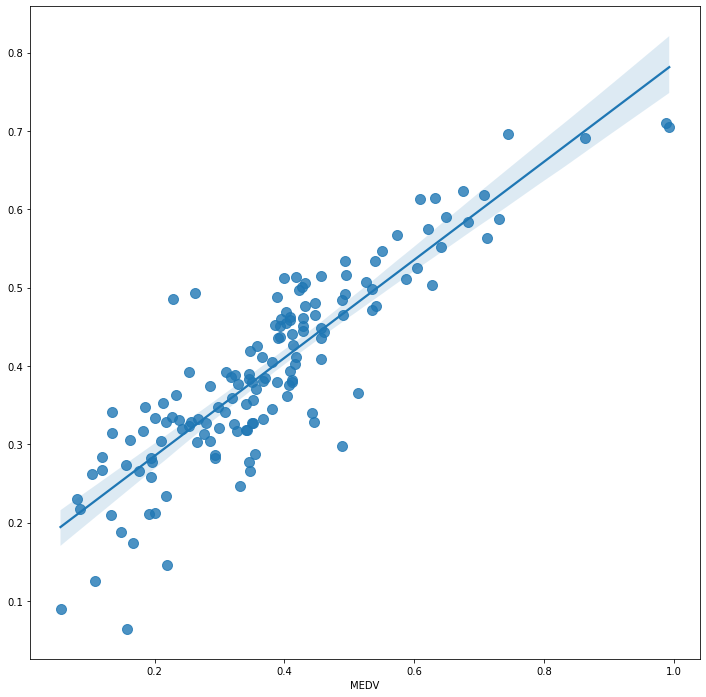

In [165]:
plt.figure(figsize=(12,12))
sns.regplot(x = y_test, y = y_predmlp, fit_reg=True, scatter_kws={"s": 100})